In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20190306152813,2019-03-06,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,...,t,f,moderate,f,f,1,1,0,0,1.54
1,5858,https://www.airbnb.com/rooms/5858,20190306152813,2019-03-06,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.93
2,7918,https://www.airbnb.com/rooms/7918,20190306152813,2019-03-06,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.15
3,8142,https://www.airbnb.com/rooms/8142,20190306152813,2019-03-06,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,Nice and good public transportation. 7 minute...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.15
4,8339,https://www.airbnb.com/rooms/8339,20190306152813,2019-03-06,Historic Alamo Square Victorian,Pls email before booking. Interior featured i...,Please send us a quick message before booking ...,Pls email before booking. Interior featured i...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.23


In [3]:
df = df[['number_of_reviews', 'id', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]
df.head()

,number_of_reviews,id,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,180,958,97.0,10.0,10.0,10.0,10.0,10.0
1,111,5858,98.0,10.0,10.0,10.0,10.0,9.0
2,17,7918,85.0,8.0,9.0,9.0,9.0,8.0
3,8,8142,93.0,9.0,10.0,10.0,9.0,9.0
4,27,8339,97.0,10.0,10.0,10.0,10.0,9.0


In [4]:
df = df[df['number_of_reviews'] > 10]  
df.head()

,number_of_reviews,id,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,180,958,97.0,10.0,10.0,10.0,10.0,10.0
1,111,5858,98.0,10.0,10.0,10.0,10.0,9.0
2,17,7918,85.0,8.0,9.0,9.0,9.0,8.0
4,27,8339,97.0,10.0,10.0,10.0,10.0,9.0
5,31,8567,90.0,8.0,10.0,10.0,9.0,9.0


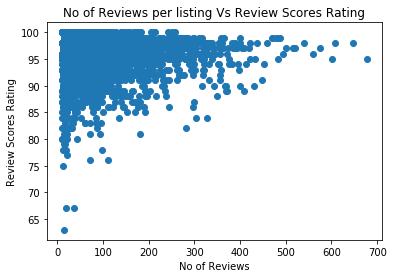

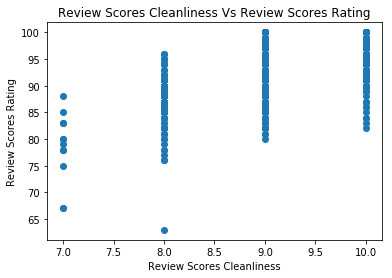

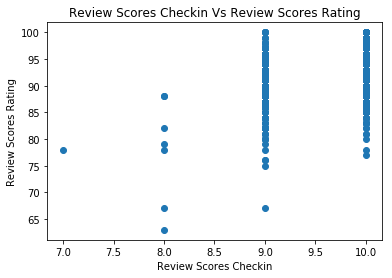

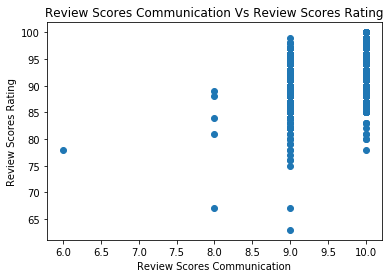

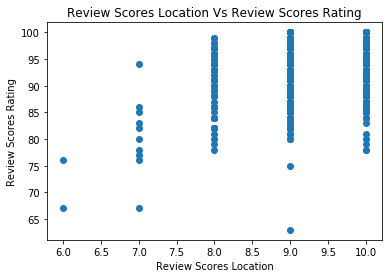

In [8]:
plt.scatter(df['number_of_reviews'], df['review_scores_rating'])
plt.title('No of Reviews per listing Vs Review Scores Rating')
plt.xlabel('No of Reviews')
plt.ylabel('Review Scores Rating')
plt.show()

plt.scatter(df['review_scores_cleanliness'], df['review_scores_rating'])
plt.title('Review Scores Cleanliness Vs Review Scores Rating')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Review Scores Rating')
plt.show()

plt.scatter(df['review_scores_checkin'], df['review_scores_rating'])
plt.title('Review Scores Checkin Vs Review Scores Rating')
plt.xlabel('Review Scores Checkin')
plt.ylabel('Review Scores Rating')
plt.show()

plt.scatter(df['review_scores_communication'], df['review_scores_rating'])
plt.title('Review Scores Communication Vs Review Scores Rating')
plt.xlabel('Review Scores Communication')
plt.ylabel('Review Scores Rating')
plt.show()

plt.scatter(df['review_scores_location'], df['review_scores_rating'])
plt.title('Review Scores Location Vs Review Scores Rating')
plt.xlabel('Review Scores Location')
plt.ylabel('Review Scores Rating')
plt.show()

In [5]:
target = df['review_scores_rating']
df = df.drop(['number_of_reviews', 'review_scores_rating'], axis = 1)
from sklearn import linear_model
X = df
y = target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [7]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [8]:
y_pred = lm.predict(X_test)

In [9]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

2.2633015968589274